**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Ismail Asaklil <br/>
Student Number: 300243534


## 1. Exploratory Analysis

### Loading the dataset

A custom dataset has been created for this assignment. It has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Access and read the dataset directly from this GitHub repository in your Jupyter notebook.

You can use this code cell for you import statements and other initializations.

In [2]:
# Code cell
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_train.csv"
url2 = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_valid.csv"
url3 = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_test.csv"


df_train = pd.read_csv(url1, sep=",", header=None);
df_valid = pd.read_csv(url2, sep=",", header=None);
df_test = pd.read_csv(url3, sep=",", header=None);

df_train.head() 

,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
0,2,0.0000,0.0556,0.0000,0.0556,0.1111,0.0000,0.0556,0.0000,0.0000,...,0.1667,0.2222,0.0000,0.0000,0.1667,0.0000,0.0,0.0000,0.000,0.0
1,2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.000,0.0
2,2,0.1905,0.0000,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.2857,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.1905,0.381,0.0
3,2,0.0225,0.0000,0.0112,0.1348,0.0000,0.0112,0.1348,0.0112,0.1685,...,0.0000,0.0787,0.0674,0.0112,0.0225,0.1573,0.0,0.0225,0.000,0.0
4,2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.6667,0.0000,0.0000,0.0,0.0000,0.000,0.0


### Data Pre-Processing

2. **Shuffling the Rows**:

    - Since examples are generated by sliding a window across each protein sequence, most adjacent examples originate from the same protein and share 20 positions. To mitigate the potential negative impact on model training, the initial step involves shuffling the **rows** of the data matrix.

In [3]:
# Code cell
# Shuffling the rows of the train dataset
df_train=df_train.sample(frac=1).reset_index(drop=True)
df_test=df_test.sample(frac=1).reset_index(drop=True)
df_valid=df_valid.sample(frac=1).reset_index(drop=True)

df_train.head()


,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
0,0,0.1000,0.0000,0.0000,0.0333,0.1333,0.0333,0.0,0.0000,0.0333,...,0.0,0.0000,0.0,0.0667,0.0,0.0000,0.0,0.0,0.0,0.0
1,2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,0.0,0.0000,0.0,0.0000,1.0,0.0000,0.0,0.0,0.0,0.0
2,0,0.1143,0.0857,0.0000,0.0000,0.0000,0.0000,0.0,0.0286,0.0000,...,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0
3,0,0.0909,0.0000,0.0455,0.0000,0.0000,0.0455,0.0,0.0455,0.1364,...,0.0,0.0000,0.0,0.0000,0.0,0.2727,0.0,0.0,0.0,0.0
4,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.7143,0.0,0.0000,0.1429,...,0.0,0.1429,0.0,0.2857,0.0,0.0000,0.0,0.0,0.0,0.0


3. **Scaling of Numerical Features**:

    - Since all 462 features are proportions represented as values between 0 and 1, scaling may not be necessary. In our evaluations, using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) actually degraded model performance. Within your pipeline, compare the effects of not scaling the data versus applying [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). In the interest of time, a single experiment will suffice. It is important to note that when scaling is applied, a uniform method should be used across all columns, given their homogeneous nature.

The purpose of scaling the features is to enhance the performance, and this is by making the features values into a specific range so that the ML algorithms converge. In this test, we will compare the nto scaling vs MinMaxScaler which consists of using the following formula:

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Let us first split the data into features and target for both the train and test datasets
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]


# Here is the scaled data
scaler = MinMaxScaler(feature_range=(0, 0.5))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# get the performance 
def get_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# here we use LogisticRegression as an example
model = LogisticRegression()
print("the accuracy of the regular model: ", get_performance(model, X_train, y_train, X_test, y_test))
print("the accuracy of the scaled model: ", get_performance(model, X_train_scaled, y_train, X_test_scaled, y_test))

the accuracy of the regular model:  0.7154198062432723
the accuracy of the scaled model:  0.714881593110872


Here i have chosen the random range $(0, 0.5)$ as an input for the MinMaxScaler. 
We can still notice that the performance is quite similar where the model trained on the original dfs scored an accuracy of $0.7154$, whereas the one trained on the scaled data scored an accuracy of $0.7148$.

4. **Isolating the Target and the Data**:

    - In the CSV files, the target and data are combined. To prepare for our machine learning experiments, separate the training data $X$ and the target vector $y$ for each of the three datasets.

In [5]:
#I solating the features and the target variable

X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]

X_valid = df_valid.iloc[:,1:]
y_valid = df_valid.iloc[:,0]

X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

### Model Development & Evaluation

5. **Model Development**:

    - **Dummy Model**: Implement a model utilizing the [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). This model disregards the input data and predicts the majority class. Such model is sometimes called a straw man model.

    - **Basline Model**: As a baseline model, select one of the previously studied machine learning algorithms: Decision Trees, K-Nearest Neighbors (KNN), or Logistic Regression. Use the default parameters provided by scikit-learn to train each model as a baseline. Why did you choose this particular classifier? Why do you think it should be appropriate for this specific task?

    - **Neural Network Model**: Utilizing [Keras](https://keras.io) and [TensorFlow](https://www.tensorflow.org), construct a sequential model comprising an input layer, a hidden layer, and an output layer. The input layer should consist of 462 nodes, reflecting the 462 attributes of each example. The hidden layer should include 8 nodes and employ the default activation function. The output layer should contain three nodes, corresponding to the three classes: helix (0), sheet (1), and coil (2). Apply the softmax activation function to the output layer to ensure that the outputs are treated as probabilities, with their sum equaling 1 for each training example.

    We therefore have three models: dummy, baseline, and neural network.

In [6]:
#DummyClassifier 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the dummy classifier: ", accuracy)

Accuracy of the dummy classifier:  0.41065662002152853


I chose Logistic Regression for the baseline model due to its simplicity and effectiveness for classification tasks. It is computationally efficient, easy to implement, and interpretable. Additionaly, it performs well with a large number of features and provides a good baseline for comparing more complex models.


In [7]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression classifier: ", accuracy)

Accuracy of the logistic regression classifier:  0.7154198062432723


In [8]:
#Neural Network model 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense



model = Sequential()
# Addition of the layers inot our NN model 
model.add(Dense(462, input_dim=462, activation='relu')) 
model.add(Dense(8, activation='relu'))  
model.add(Dense(3, activation='softmax'))

#Compile the NN
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# here i have chosen 50 epochs and a batch size of 32 because i want to train the model for 50 iterations and i want to use 32 samples to update the model's weights at each iteration
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)

Epoch 1/50


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6365 - loss: 0.8187 - val_accuracy: 0.6801 - val_loss: 0.7423
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7270 - loss: 0.6622 - val_accuracy: 0.7028 - val_loss: 0.7047
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7758 - loss: 0.5515 - val_accuracy: 0.7062 - val_loss: 0.7079
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8336 - loss: 0.4263 - val_accuracy: 0.7031 - val_loss: 0.7658
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8921 - loss: 0.2971 - val_accuracy: 0.6915 - val_loss: 0.8754
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9288 - loss: 0.1994 - val_accuracy: 0.6790 - val_loss: 1.0350
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9513 - loss: 0.1380 - val_accuracy: 0.6673 - val_loss: 1.2439
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9673 - loss: 0.0995 - val_accurac

6. **Model Evaluation**:

    - Employ cross-validation to assess the performance of the baseline model. Select a small number of folds to prevent excessive computational demands.

Performed cross validation and displayed the different metrics

In [9]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_validate

# We are going to use the following metrics to evaluate the models
metrics ={
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='micro'),
    'recall': make_scorer(recall_score, average='micro'),
    'f1_score': make_scorer(f1_score, average='micro')
}

#creating folds for the cross validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# we are calling the log_reg which is our baseline model we have used ealier
# Here im using the cross_validate because i want to use multiple metrics to evaluate the model
log_reg_score = cross_validate(log_reg, X_train, y_train, cv=k_folds, scoring=metrics) 

print("Logistic Regression:", log_reg_score)

Logistic Regression: {'fit_time': array([0.83251405, 1.32074881, 1.31347919, 1.07715988, 0.71812296]), 'score_time': array([0.01081395, 0.00673318, 0.00673985, 0.00660205, 0.00742197]), 'test_accuracy': array([0.68582211, 0.6840796 , 0.68965517, 0.68699605, 0.68365071]), 'test_precision': array([0.68582211, 0.6840796 , 0.68965517, 0.68699605, 0.68365071]), 'test_recall': array([0.68582211, 0.6840796 , 0.68965517, 0.68699605, 0.68365071]), 'test_f1_score': array([0.68582211, 0.6840796 , 0.68965517, 0.68699605, 0.68365071])}


We can notice here that the format of the output is not really intuitive. Let us fix that by creating a function that will display in a better way the results.

In [10]:
def display_metrics(scores):
    # I m using a format print to create a table of the metrics
    print(f"{'Fold':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10}")
    for i, (accuracy, precision, recall, f1) in enumerate(zip(scores['test_accuracy'], scores['test_precision'], scores['test_recall'], scores['test_f1_score'])):
        print(f"{i+1:<10} {accuracy:<10.3f} {precision:<10.3f} {recall:<10.3f} {f1:<10.3f}")
    print()
    print("Mean values of the metrics")
    print(f"{'Mean':<10} {np.mean(scores['test_accuracy']):<10.3f} {np.mean(scores['test_precision']):<10.3f} {np.mean(scores['test_recall']):<10.3f} {np.mean(scores['test_f1_score']):<10.3f}")

display_metrics(log_reg_score)

Fold       Accuracy   Precision  Recall     F1-score  
1          0.686      0.686      0.686      0.686     
2          0.684      0.684      0.684      0.684     
3          0.690      0.690      0.690      0.690     
4          0.687      0.687      0.687      0.687     
5          0.684      0.684      0.684      0.684     

Mean values of the metrics
Mean       0.686      0.686      0.686      0.686     


In [11]:
#Evaluation of the Neural Network model
print("\nEvaluating Neural Network on the validation set:")
nn_eval = model.evaluate(X_valid, y_valid)
print(f"Validation Loss: {nn_eval[0]:.4f}")
print(f"Validation Accuracy: {nn_eval[1]:.4f}")


Evaluating Neural Network on the validation set:
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.6699 - loss: 3.7518
Validation Loss: 3.8754
Validation Accuracy: 0.6669


    - **Training neural networks can be time-consuming.** Consequently, their performance is typically assessed once using a validation set. Make sure to not use the test set until the very end of the assignment.

    - Assess the models using metrics such as precision, recall, and F1-score.

### Hyperparameter Optimization

7. **Baseline Model:**

    - To ensure a fair comparison for our baseline model, we will examine how varying hyperparameter values affect its performance. This prevents the erroneous conclusion that neural networks inherently perform better, when in fact, appropriate hyperparameter tuning could enhance the baseline model's performance.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [12]:
# Code cell
# Hyperparameter grid for Logistic Regression including default values
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# We are going to use the following metrics to evaluate the models
metrics ={
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='micro'),
    'recall': make_scorer(recall_score, average='micro'),
    'f1_score': make_scorer(f1_score, average='micro')
}

parameters = [
    {
        'penalty': ['l2', None],       # Default is 'l2'
        'max_iter': [100, 200, 500],  # Default is 100
        'tol': [1e-4]                  # Default is 1e-4
    },
    {
        'penalty': ['l1', 'l2', None], # 'l2' is default
        'max_iter': [100, 200, 500],  # Default is 100
        'tol': [1e-4]                  # Default is 1e-4
    }
]

# Cross-validation strategy
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Grid Search with Cross-Validation
grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=parameters,
    cv=cv_folds,
    scoring=metrics, # i want to use multiple metrics to evaluate the model
    refit='f1_score',
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'max_iter': [100, 200, 500], 'penalty': ['l2', None],
                          'tol': [0.0001]},
                         {'max_iter': [100, 200, 500],
                          'penalty': ['l1', 'l2', None], 'tol': [0.0001]}],
             refit='f1_score', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1_score': make_scorer(f1_score, response_method='predict', average=micro),
                      'precision': make_scorer(precision_score, response_method='predict', average=micro),
                      'recall': make_scorer(recall_score, response_method='predict', average=micro)},
             verbose=1)

After applying the GirdSearch strategy, Let us visualize the results

In [13]:
def display_best_params(grid_search_lr):
    """Display the best parameters and F1 score from grid search."""
    print("Best Parameters:", grid_search_lr.best_params_)
    print("Best F1 Score:", grid_search_lr.best_score_)

def process_results(grid_search_lr):
    """Convert cv_results_ to a DataFrame, process and sort it."""
    results_df = pd.DataFrame(grid_search_lr.cv_results_)
    results_df['param_penalty'] = results_df['param_penalty'].apply(lambda x: 'none' if x is None else x)
    return results_df.sort_values(by='mean_test_f1_score', ascending=False)

def print_grouped_results(results_df):
    """Group results by penalty and print detailed statistics."""
    for penalty, group in results_df.groupby('param_penalty'):
        print(f"\nStatistics for Penalty: {penalty}")
        print(f"{'Tolerance (tol)':<20} {'Max Iterations':<20} {'Mean Precision':<20} "
              f"{'Mean Recall':<20} {'Mean F1 Score':<20}")
        print("-" * 100)

        # Sort by F1 score in descending order and print each row
        for _, row in group.sort_values(by='mean_test_f1_score', ascending=False).iterrows():
            print(f"{row['param_tol']:<20.4f} {row['param_max_iter']:<20} "
                  f"{row['mean_test_precision']:<20.3f} {row['mean_test_recall']:<20.3f} "
                  f"{row['mean_test_f1_score']:<20.3f}")

# Execute the functions
display_best_params(grid_search_lr)
sorted_results_df = process_results(grid_search_lr)
print_grouped_results(sorted_results_df)


Best Parameters: {'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}
Best F1 Score: 0.6870870970558096

Statistics for Penalty: l1
Tolerance (tol)      Max Iterations       Mean Precision       Mean Recall          Mean F1 Score       
----------------------------------------------------------------------------------------------------
0.0001               100                  nan                  nan                  nan                 
0.0001               200                  nan                  nan                  nan                 
0.0001               500                  nan                  nan                  nan                 

Statistics for Penalty: l2
Tolerance (tol)      Max Iterations       Mean Precision       Mean Recall          Mean F1 Score       
----------------------------------------------------------------------------------------------------
0.0001               100                  0.687                0.687                0.687               
0.0001     

8. **Neural Network:**

    In our exploration and tuning of neural networks, we focus on the following hyperparameters:

    - **Single hidden layer, varying the number of nodes**. 

        - Start with a single node in the hidden layer. Use a graph to depict the progression of loss and accuracy for both the training and validation sets, with the horizontal axis representing the number of training epochs and the vertical axis showing loss and accuracy. Training this network should be relatively fast, so let's conduct training for 50 epochs. Observing the graph, what do you conclude? Is the network underfitting or overfitting? Why?

        - Repeat the above process using 2 and 4 nodes in the hidden layer. Use the same type of graph to document your observations regarding loss and accuracy.

        - Start with 8 nodes in the hidden layer and progressively double the number of nodes until it surpasses the number of nodes in the input layer. This results in seven experiments and corresponding graphs for the following configurations: 8, 16, 32, 64, 128, 256, and 512 nodes. Document your observations throughout the process.
        
        - Ensure that the **number of training epochs** is adequate for **observing an increase in validation loss**. **Tip**: During model development, start with a small number of epochs, such as 5 or 10. Once the model appears to perform well, test with larger values, like 40 or 80 epochs, which proved reasonable in our tests. Based on your observations, consider conducting further experiments, if needed. How many epochs were ultimately necessary?

In [14]:
import tensorflow as tf
import pandas as pd
import altair as alt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the models and number of hidden nodes
models_config = [
    {'model_name': 'one_node', 'hidden_nodes': 1},
    {'model_name': 'two_nodes', 'hidden_nodes': 2},
    {'model_name': 'four_nodes', 'hidden_nodes': 4}
]

def create_and_train_model(hidden_nodes):
    """Create, compile, and train a model based on the number of hidden nodes."""
    model = Sequential([
        InputLayer(input_shape=(462,)),
        Dense(hidden_nodes, activation='relu'),  # Hidden layer with variable nodes
        Dense(3, activation='softmax')  # Output layer with 3 nodes
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_valid, y_valid),
        verbose=0  # Set to 0 to reduce verbose output during training
    )
    
    return history

def prepare(history, hidden_nodes):
    """Prepare the training and validation data for Altair plotting."""
    # Convert history to DataFrame
    df = pd.DataFrame({
        'epoch': range(1, 51),
        'training_accuracy': history.history['accuracy'],
        'validation_accuracy': history.history['val_accuracy'],
        'training_loss': history.history['loss'],
        'validation_loss': history.history['val_loss'],
        'hidden_nodes': [hidden_nodes] * 50
    })
    
    # Melt the dataframe for better use in Altair
    df = df.melt(id_vars=['epoch', 'hidden_nodes'], 
                 value_vars=['training_accuracy', 'validation_accuracy', 'training_loss', 'validation_loss'],
                 var_name='metric', value_name='value')
    
    return df

def plot_training_results(df):
    """Plot the training and validation accuracy and loss using Altair."""
    # Accuracy plot
    accuracy_chart = alt.Chart(df[df['metric'].str.contains('accuracy')]).mark_line().encode(
        x='epoch',
        y='value',
        color='metric',
        column='hidden_nodes',
        tooltip=['epoch', 'value', 'metric']
    ).properties(title="Accuracy for Different Models (Hidden Nodes)")

    # Loss plot
    loss_chart = alt.Chart(df[df['metric'].str.contains('loss')]).mark_line().encode(
        x='epoch',
        y='value',
        color='metric',
        column='hidden_nodes',
        tooltip=['epoch', 'value', 'metric']
    ).properties(title="Loss for Different Models (Hidden Nodes)")
    
    return accuracy_chart, loss_chart

# Loop over model configurations (1, 2, and 4 hidden nodes)
df_all_models = pd.DataFrame()
for config in models_config:
    history = create_and_train_model(config['hidden_nodes'])
    df_model = prepare(history, config['hidden_nodes'])
    df_all_models = pd.concat([df_all_models, df_model], ignore_index=True)

# Plot the results
accuracy_chart, loss_chart = plot_training_results(df_all_models)


# Combine accuracy and loss charts for each model configuration
combined_charts = alt.vconcat()

for hidden_nodes in df_all_models['hidden_nodes'].unique():
    accuracy_chart = alt.Chart(df_all_models[(df_all_models['hidden_nodes'] == hidden_nodes) & (df_all_models['metric'].str.contains('accuracy'))]).mark_line().encode(
        x='epoch',
        y='value',
        color='metric',
        tooltip=['epoch', 'value', 'metric']
    ).properties(title=f"Accuracy for Model with {hidden_nodes} Hidden Nodes")

    loss_chart = alt.Chart(df_all_models[(df_all_models['hidden_nodes'] == hidden_nodes) & (df_all_models['metric'].str.contains('loss'))]).mark_line().encode(
        x='epoch',
        y='value',
        color='metric',
        tooltip=['epoch', 'value', 'metric']
    ).properties(title=f"Loss for Model with {hidden_nodes} Hidden Nodes")

    combined_charts &= (accuracy_chart | loss_chart)

# Display the combined charts
combined_charts.display()



/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


alt.VConcatChart(...)

From the graphs we can clearly notice that increasing the number of hidden nodes to 2 and 4 improves the model's ability to learn the relationships in the data, leading to better accuracy on both the training and validation sets. 

In [15]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# List of node counts to test
nodes_list = [8, 16, 32, 64, 128, 256, 512]

# Prepare a DataFrame to collect all metrics for plotting
df_all_models = pd.DataFrame()

for nodes in nodes_list:
    print(f"\nTraining model with {nodes} hidden nodes:")
    
    # Define the model architecture
    model = Sequential([
        InputLayer(input_shape=(462,)),
        Dense(nodes, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_valid, y_valid),
        verbose=0
    )
    
    # Prepare data for plotting
    df = pd.DataFrame({
        'epoch': range(1, 51),
        'training_accuracy': history.history['accuracy'],
        'validation_accuracy': history.history['val_accuracy'],
        'training_loss': history.history['loss'],
        'validation_loss': history.history['val_loss'],
        'hidden_nodes': [nodes] * 50
    })
    
    # Melt the dataframe for long format
    df_long = df.melt(id_vars=['epoch', 'hidden_nodes'], 
                      value_vars=['training_accuracy', 'validation_accuracy', 'training_loss', 'validation_loss'],
                      var_name='metric', value_name='value')
    
    # Concatenate all data
    df_all_models = pd.concat([df_all_models, df_long], ignore_index=True)

# Plotting with Altair

# Define the color mapping for metrics
color_mapping = {
    'training_accuracy': 'Training Accuracy',
    'validation_accuracy': 'Validation Accuracy',
    'training_loss': 'Training Loss',
    'validation_loss': 'Validation Loss'
}

df_all_models['metric'] = df_all_models['metric'].map(color_mapping)

# Altair plot: Interactive plot for all models
chart = alt.Chart(df_all_models).mark_line().encode(
    x='epoch',
    y='value',
    color='metric',
    column='hidden_nodes:O',  # Separate charts for each node configuration
    tooltip=['epoch', 'value', 'metric', 'hidden_nodes']
).properties(
    title="Model Performance: Accuracy & Loss for Different Hidden Node Configurations",
    width=300,
    height=300
)

# Display the chart
chart.display()



Training model with 8 hidden nodes:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 16 hidden nodes:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 32 hidden nodes:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 64 hidden nodes:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 128 hidden nodes:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 256 hidden nodes:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 512 hidden nodes:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


alt.Chart(...)

From the graphs, we can notice that the more we increase the number of nodes, the more we tend to have an increase on loss metrics, especially the Validation_loss in the cases of 128, 256, 512.

    - **Varying the number of layers**.

        - Conduct similar experiments as described above, but this time vary the number of layers from 1 to 4. Document your findings.

        - How many nodes should each layer contain? Test at least two scenarios. Traditionally, a common strategy involved decreasing the number of nodes from the input layer to the output layer, often by halving, to create a pyramid-like structure. However, recent experience suggests that maintaining a constant number of nodes across all layers can perform equally well. Describe your observations. It is acceptable if both strategies yield similar performance results.

        - Select one your models that exemplifies overfitting. In our experiments, we easily constructed a model achieving nearly 100% accuracy on the training data, yet showing no similar improvement on the validation set. Present this neural network along with its accuracy and loss graphs. Explain the reasoning for concluding that the model is overfitting.

In [16]:
# Function to build model with a given number of layers and nodes
def build_model(num_layers, nodes_per_layer):
    model = Sequential()
    model.add(InputLayer(input_shape=(462,)))
    for _ in range(num_layers):
        model.add(Dense(nodes_per_layer, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    return model

# Number of layers to test
layers_list = [1, 2, 3, 4]
nodes_per_layer = 128  # You can adjust this value

# Prepare a DataFrame to collect all metrics for plotting
df_all_models = pd.DataFrame()

for num_layers in layers_list:
    print(f"\nTraining model with {num_layers} hidden layers:")
    model = build_model(num_layers, nodes_per_layer)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_valid, y_valid),
        verbose=0
    )

    # Prepare data for plotting
    df = pd.DataFrame({
        'epoch': range(1, 51),
        'training_accuracy': history.history['accuracy'],
        'validation_accuracy': history.history['val_accuracy'],
        'training_loss': history.history['loss'],
        'validation_loss': history.history['val_loss'],
        'num_layers': [num_layers] * 50
    })
    
    # Melt the dataframe for long format
    df_long = df.melt(id_vars=['epoch', 'num_layers'], 
                      value_vars=['training_accuracy', 'validation_accuracy', 'training_loss', 'validation_loss'],
                      var_name='metric', value_name='value')
    
    # Concatenate all data
    df_all_models = pd.concat([df_all_models, df_long], ignore_index=True)

# Plotting with Altair

# Define the color mapping for metrics
color_mapping = {
    'training_accuracy': 'Training Accuracy',
    'validation_accuracy': 'Validation Accuracy',
    'training_loss': 'Training Loss',
    'validation_loss': 'Validation Loss'
}

df_all_models['metric'] = df_all_models['metric'].map(color_mapping)

# Altair plot: Interactive plot for all models
chart = alt.Chart(df_all_models).mark_line().encode(
    x='epoch',
    y='value',
    color='metric',
    column='num_layers:O',  # Separate charts for each layer configuration
    tooltip=['epoch', 'value', 'metric', 'num_layers']
).properties(
    title="Model Performance: Accuracy & Loss for Different Layer Configurations",
    width=300,
    height=300
)

# Display the chart
chart.display()



Training model with 1 hidden layers:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 2 hidden layers:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 3 hidden layers:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 4 hidden layers:


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


alt.Chart(...)

Let's see the scenario where we have constant nodes per layer

In [18]:
import altair as alt

nodes_per_layer = 64  # Adjust as needed
layers_list = [1, 2, 3, 4]

print("\nTesting Constant Nodes per Layer:")
df_all_models = pd.DataFrame()

for num_layers in layers_list:
    print(f"\nTraining model with {num_layers} layers of {nodes_per_layer} nodes each")
    model = build_model(num_layers, nodes_per_layer)
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_valid, y_valid),
        verbose=0
    )

    # Prepare data for plotting
    df = pd.DataFrame({
        'epoch': range(1, 51),
        'training_accuracy': history.history['accuracy'],
        'validation_accuracy': history.history['val_accuracy'],
        'training_loss': history.history['loss'],
        'validation_loss': history.history['val_loss'],
        'num_layers': [num_layers] * 50
    })
    
    # Melt the dataframe for long format
    df_long = df.melt(id_vars=['epoch', 'num_layers'], 
                      value_vars=['training_accuracy', 'validation_accuracy', 'training_loss', 'validation_loss'],
                      var_name='metric', value_name='value')
    
    # Concatenate all data
    df_all_models = pd.concat([df_all_models, df_long], ignore_index=True)

# Define the color mapping for metrics
color_mapping = {
    'training_accuracy': 'Training Accuracy',
    'validation_accuracy': 'Validation Accuracy',
    'training_loss': 'Training Loss',
    'validation_loss': 'Validation Loss'
}

df_all_models['metric'] = df_all_models['metric'].map(color_mapping)

# Altair plot: Interactive plot for all models
chart = alt.Chart(df_all_models).mark_line().encode(
    x='epoch',
    y='value',
    color='metric',
    column='num_layers:O',  # Separate charts for each layer configuration
    tooltip=['epoch', 'value', 'metric', 'num_layers']
).properties(
    title="Model Performance: Accuracy & Loss for Different Layer Configurations",
    width=300,
    height=300
)

# Display the chart
chart.display()



Testing Constant Nodes per Layer:

Training model with 1 layers of 64 nodes each


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 2 layers of 64 nodes each


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 3 layers of 64 nodes each


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training model with 4 layers of 64 nodes each


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


alt.Chart(...)

Now, we are going to see the scenario of decreasing nodes per layer that forms a Pyramid Structure

Testing Pyramid Structure:

Training model with layers: [128]


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


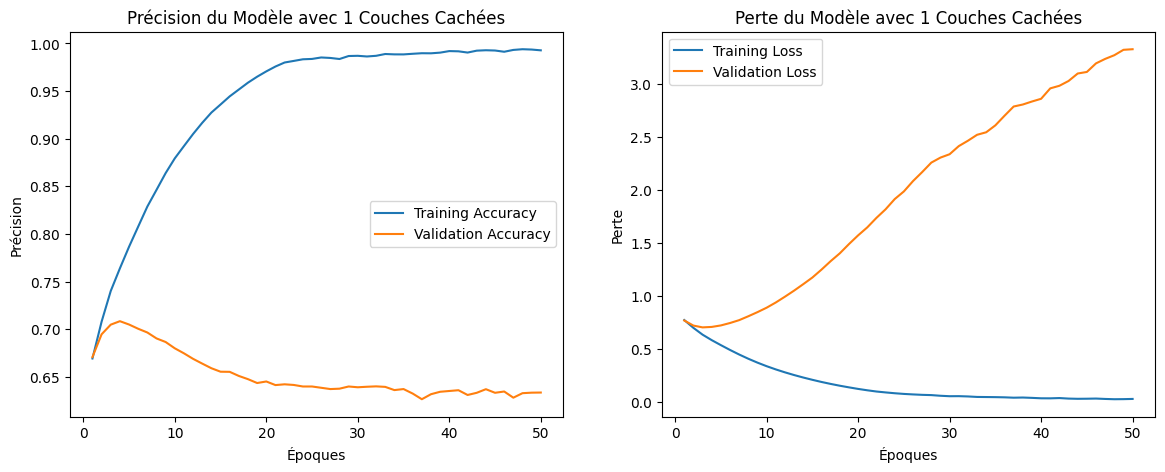


Training model with layers: [128, 64]


/Users/ismail/Documents/Study/CSI4106/Assignments/A3/A3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
layers_list = [1, 2, 3, 4]

print("Testing Pyramid Structure:")
df_all_models
    nodes = [128 // (2 ** i) for i in range(num_layers)]  # Decrease nodes per layer
    print(f"\nTraining model with layers: {nodes}")
    model = Sequential()
    model.add(InputLayer(input_shape=(462,)))
    for n in nodes:
        model.add(Dense(n, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    # Compile, train, and plot as before
    # ...


    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_valid, y_valid),
        verbose=0
    )

    # Plot the results
    epochs_range = range(1, 51)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.title(f'Précision du Modèle avec {num_layers} Couches Cachées')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.title(f'Perte du Modèle avec {num_layers} Couches Cachées')
    plt.legend()

    plt.show()


In [ ]:
# Select a complex model that overfits
model_overfit = Sequential([
    InputLayer(input_shape=(462,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model_overfit.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_overfit = model_overfit.fit(
    X_train, y_train,
    epochs=80,  # Increased epochs to observe overfitting
    batch_size=32,
    validation_data=(X_valid, y_valid),
    verbose=1
)

# Plot the results
epochs_range = range(1, 81)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_overfit.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history_overfit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.title('Précision du Modèle Illustrant le Surapprentissage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_overfit.history['loss'], label='Training Loss')
plt.plot(epochs_range, history_overfit.history['val_loss'], label='Validation Loss')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.title('Perte du Modèle Illustrant le Surapprentissage')
plt.legend()

plt.show()


    - **Activation function**.

        - Present results for one of the configurations mentioned above by varying the activation function. Test at least `relu` (the default) and `sigmoid`. The choice of the specific model, including the number of layers and nodes, is at your discretion. Document your observations accordingly.

In [17]:
# Code cell

    - **Regularization** in neural networks is a technique used to prevent overfitting.

        - One technique involves adding a penalty to the loss function to discourage excessively complex models. Apply an `l2` penalty to some or all layers. Exercise caution, as overly aggressive penalties have been problematic in our experiments. Begin with the default `l2` value of 0.01, then reduce it to 0.001 and 1e-4. Select a specific model from the above experiments and present a case where you successfully reduced overfitting. Include a pair of graphs comparing results with and without regularization. Explain your rationale to conclude that overfitting has been reduced. Do not expect to completely eliminate overfitting. Again, this is a challenging dataset to work with.

In [ ]:
# Code cell
from tensorflow.keras.regularizers import l2

l2_values = [0.01, 0.001, 1e-4]

for l2_value in l2_values:
    print(f"\nTraining model with L2 regularization (lambda={l2_value})")
    model = Sequential([
        InputLayer(input_shape=(462,)),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_value)),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_value)),
        Dense(3, activation='softmax')
    ])

    # Compile, train, and plot as before
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_valid, y_valid),
        verbose=0
    )

    # Plot the results
    epochs_range = range(1, 51)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.title(f'Précision du Modèle avec {num_layers} Couches Cachées')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.title(f'Perte du Modèle avec {num_layers} Couches Cachées')
    plt.legend()

    plt.show()


        - Dropout layers are a regularization technique in neural networks where a random subset of neurons is temporarily removed during training. This helps prevent overfitting by promoting redundancy and improving the network's ability to generalize to new data. Select a specific model from the above experiments where you have muliple layers and experiment adding one or of few dropout layers into your network. Experiment with two different rates, say 0.25 and 0.5. Document your observations.

In [ ]:
# Code cell
from tensorflow.keras.layers import Dropout

dropout_rates = [0.25, 0.5]

for rate in dropout_rates:
    print(f"\nTraining model with dropout rate {rate}")
    model = Sequential([
        InputLayer(input_shape=(462,)),
        Dense(128, activation='relu'),
        Dropout(rate),
        Dense(128, activation='relu'),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])

    # Now we Compile, train, and plot as before

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_valid, y_valid),
        verbose=0
    )

    # Plot the results
    epochs_range = range(1, 51)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.title(f'Précision du Modèle avec {num_layers} Couches Cachées')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.title(f'Perte du Modèle avec {num_layers} Couches Cachées')
    plt.legend()

    plt.show()


        - Summarize your experiments with using a graphical representation such as Figure 6.15 [on this page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

In [ ]:
# Code cell

        - Early stopping is a regularization technique in neural network training wherein the process is halted when validation set performance starts to decline, thus preventing overfitting by avoiding the learning of noise in the training data. From all the experiments conducted thus far, choose **one** configuration (the number of layers, number of nodes, activation function, L2 penalty, and dropout layers) that yielded the best performance. Use a graph of loss and accuracy to determine the optimal number of training iterations for this network. What is the optimal number of epochs for this network configuration and why?

In [ ]:
# Code cell
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with the best configuration
model = Sequential([
    InputLayer(input_shape=(462,)),
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.25),
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping],
    verbose=1
)

# Plot the results
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.title('Précision du Modèle avec Arrêt Anticipé')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.title('Perte du Modèle avec Arrêt Anticipé')
plt.legend()

plt.show()

print(f"Le nombre optimal d'époques est {len(epochs_range)}")


### Test

9. **Model Comparison**:

    - Evaluate the baseline model on the test set, using the optimal parameter set identified through grid search. Additionally, apply your best-performing neural network configuration to the test set.

    - Quantify the performance of the baseline model (best hyperparameter configuration) and your neural network (best configuration) using precision, recall, and F1-score as metrics. How do these two models compare to the dummy model?

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

In [ ]:
# Code cell
# Evaluate the best Logistic Regression model on the test set
best_log_reg = grid_search_lr.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)

print("Performance du Modèle de Référence sur l'Ensemble de Test:")
print(classification_report(y_test, y_pred_log_reg))

# Evaluate the best Neural Network model on the test set
nn_eval_test = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPerformance du Réseau de Neurones sur l'Ensemble de Test:")
print(f"Loss: {nn_eval_test[0]:.4f}")
print(f"Accuracy: {nn_eval_test[1]:.4f}")

# Predict using the neural network
y_pred_nn = model.predict(X_test)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

print(classification_report(y_test, y_pred_nn_classes))

# Evaluate the Dummy Classifier on the test set
y_pred_dummy = dummy_clf.predict(X_test)
print("\nPerformance du Modèle de Base sur l'Ensemble de Test:")
print(classification_report(y_test, y_pred_dummy))


# Resources